In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay)

In [3]:
data = pd.read_csv("pima_data_diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data.shape)
data.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

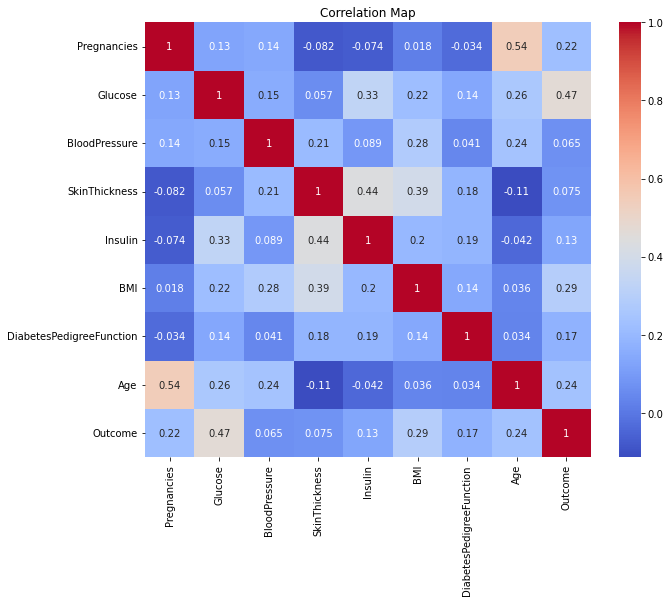

In [8]:
#Correlation

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

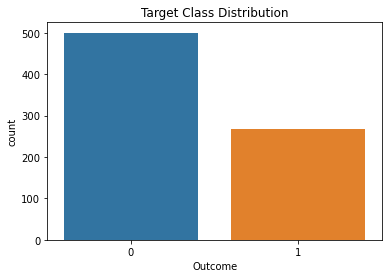

In [9]:
sns.countplot(x='Outcome', data=data)
plt.title('Target Class Distribution')
plt.show()

In [10]:
correlation_with_target = data.corr()['Outcome'].sort_values(ascending=False)
print(correlation_with_target)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [11]:
#Dropping weak features
data.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [12]:
#Handling missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#Seperating features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [14]:
#Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, stratify=y, random_state=42)

In [16]:
#Training model

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [25]:
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(max_depth=5,min_samples_split=10,min_samples_leaf=5,max_leaf_nodes=15,random_state=42)
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=10,min_samples_leaf=5,random_state=42)

In [26]:
models = {'Naive Bayes': nb_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model}

In [27]:
from sklearn.metrics import f1_score, classification_report
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Model: Naive Bayes
Accuracy: 0.7241379310344828
F1 Score: 0.6097560975609756
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        76
           1       0.60      0.62      0.61        40

    accuracy                           0.72       116
   macro avg       0.70      0.70      0.70       116
weighted avg       0.73      0.72      0.73       116

Confusion Matrix:
 [[59 17]
 [15 25]]

 Model: Decision Tree
Accuracy: 0.7672413793103449
F1 Score: 0.619718309859155
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        76
           1       0.71      0.55      0.62        40

    accuracy                           0.77       116
   macro avg       0.75      0.72      0.73       116
weighted avg       0.76      0.77      0.76       116

Confusion Matrix:
 [[67  9]
 [18 22]]

 Model: Random Forest
Accuracy: 0.7758620689655172
F1 Score: 0

In [29]:
#Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True)
models = {'Decision Tree': dt_model,'Random Forest': rf_model}
for name, model in models.items():
    acc_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1')

    print(f"\n🔍 Cross-Validation Results: {name}")
    print("Mean Accuracy:", round(acc_scores.mean(), 4), "+/-", round(acc_scores.std(), 4))
    print("Mean F1 Score:", round(f1_scores.mean(), 4), "+/-", round(f1_scores.std(), 4))


🔍 Cross-Validation Results: Decision Tree
Mean Accuracy: 0.7514 +/- 0.025
Mean F1 Score: 0.6001 +/- 0.04

🔍 Cross-Validation Results: Random Forest
Mean Accuracy: 0.7591 +/- 0.0353
Mean F1 Score: 0.6457 +/- 0.019


In [30]:
#GridsearchCV for RF

from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None]}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("\n Best Parameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

 Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 150}


In [31]:
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [32]:
print(f"Random Forest has an accuracy of {accuracy:.4f} and F1 score of {f1:.4f}")

Random Forest has an accuracy of 0.8103 and F1 score of 0.7105


In [34]:
#Ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', best_rf),('nb', GaussianNB())],voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Ensemble Model F1 Score:", f1_score(y_test, y_pred_ensemble))

Ensemble Model Accuracy: 0.7931034482758621
Ensemble Model F1 Score: 0.6666666666666665


In [35]:
#SVM 
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

Accuracy: 0.75
F1 Score: 0.6233766233766234


In [36]:
# Parameter grid for RBF SVC
param_grid_svc = {'C': [0.1, 1, 10, 50],'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']}

svc_grid = GridSearchCV(SVC(probability=True), param_grid_svc, scoring='f1', cv=5, verbose=1, n_jobs=-1)
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_
print("Best SVC Params:", svc_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVC Params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [37]:
y_pred_svc = best_svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))

Accuracy: 0.75
F1 Score: 0.6233766233766234


In [40]:
ensemble_model2 = VotingClassifier(estimators=[('rf', best_rf), ('svc', best_svc)],voting='soft')
ensemble_model2.fit(X_train, y_train)
y_pred_ensemble2 = ensemble_model2.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble2))
print("F1 Score:", f1_score(y_test, y_pred_ensemble2))

Accuracy: 0.7758620689655172
F1 Score: 0.6666666666666667


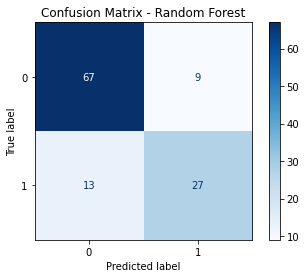

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.75      0.68      0.71        40

    accuracy                           0.81       116
   macro avg       0.79      0.78      0.78       116
weighted avg       0.81      0.81      0.81       116



In [43]:
#Compute confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()
print("Classification Report:\n", classification_report(y_test,y_pred))

In [44]:
tn, fp, fn, tp = cm.ravel()

#specificity
specificity = tn / (tn + fp)
print("Specificity (Random Forest):", round(specificity, 4))

Specificity (Random Forest): 0.8816


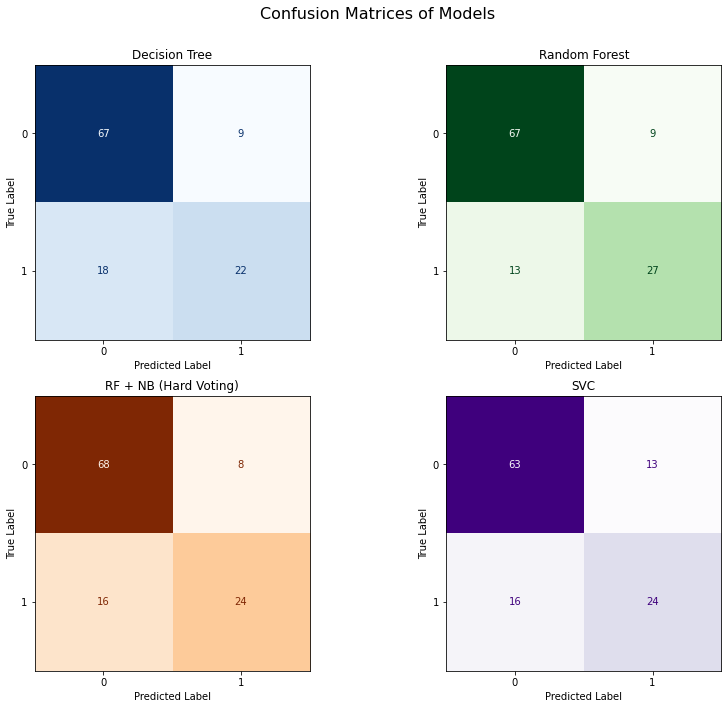

In [45]:
#Confusion matrix for all models

y_pred_dt = dt_model.predict(X_test)         # Decision Tree
y_pred_rf = best_rf.predict(X_test)          # Random Forest
y_pred_rfnb = ensemble_model.predict(X_test)    # RF + NB
y_pred_svc = best_svc.predict(X_test)        # SVC

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rfnb = confusion_matrix(y_test, y_pred_rfnb)
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices of Models", fontsize=16)

#Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(ax=axes[0, 0], cmap='Blues', colorbar=False)
axes[0, 0].set_title("Decision Tree")

#Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[0, 1], cmap='Greens', colorbar=False)
axes[0, 1].set_title("Random Forest")

#=RF + NB Ensemble
disp_rfnb = ConfusionMatrixDisplay(confusion_matrix=cm_rfnb)
disp_rfnb.plot(ax=axes[1, 0], cmap='Oranges', colorbar=False)
axes[1, 0].set_title("RF + NB (Hard Voting)")

#SVC
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot(ax=axes[1, 1], cmap='Purples', colorbar=False)
axes[1, 1].set_title("SVC")

for ax in axes.flat:
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.savefig("confusion_matrices_all.png")
plt.show()